# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [2]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [4]:
df_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [5]:
import pandas as pd
print(df_data.shape)

(150, 4)


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [6]:
#displayに変更しました。
display(df_data.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.4. `df_data` に欠損値がないかを確認しましょう。

In [7]:
print(df_data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [8]:
# df_targetのうちランダムに10行表示
df_target.sample(10)

,target
0,0
104,2
70,1
148,2
46,0
57,1
105,2
101,2
141,2
6,0


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

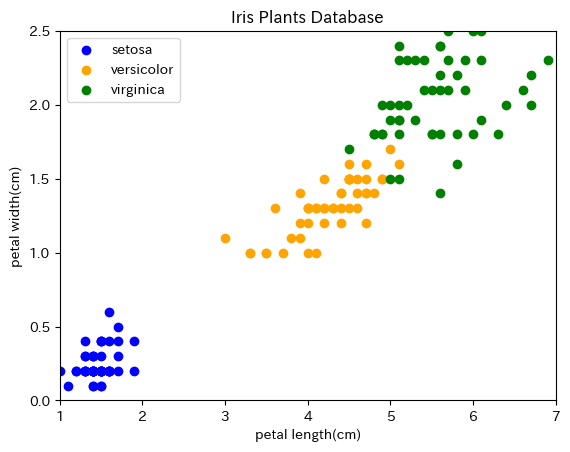

In [9]:
#必要モジュールのインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_iris
import pandas as pd

# Irisデータの読み込み
iris = load_iris()
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 目的変数を含むデータフレームの作成
df_target = pd.DataFrame(iris.target, columns=["target"])

# データの連結
df_data_concat = pd.concat([df_data, df_target], axis=1)

# 各品種のデータフレームを作成
df_0 = df_data_concat[df_data_concat["target"] == 0]
df_1 = df_data_concat[df_data_concat["target"] == 1]
df_2 = df_data_concat[df_data_concat["target"] == 2]

# 散布図の表示
plt.scatter(df_0["petal length (cm)"], df_0["petal width (cm)"], label="setosa", marker="o", color="b")
plt.scatter(df_1["petal length (cm)"], df_1["petal width (cm)"], label="versicolor", marker="o", color="orange")
plt.scatter(df_2["petal length (cm)"], df_2["petal width (cm)"], label="virginica", marker="o", color="g")

# タイトル
plt.title('Iris Plants Database')
# x軸とy軸
plt.xlabel('petal length(cm)'), plt.ylabel('petal width(cm)')
# x軸とy軸の値の範囲
plt.xlim(1, 7), plt.ylim(0.0, 2.5)

# 凡例の表示
plt.legend()
plt.show()


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [16]:
# 分割されたデータのサイズを確認
print("Training set size", len(x_train))
print("Test set size", len(x_test))
print("Training set size", len(y_train))
print("Test set size", len(y_test))

Training set size 120
Test set size 30
Training set size 120
Test set size 30


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [12]:
#インスタンスを生成
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, random_state=0)

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [13]:
#モデルの学習
clf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [14]:
#学習したモデルにx_testを入力→predict
y_pred = clf.predict(x_test)


6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [15]:
#モデルの評価モジュールから精度をインポート
from sklearn.metrics import accuracy_score
#精度　＝　精度スコア（y_test,x_test)
accuracy = accuracy_score(y_test, y_pred)
#精度を出力
print(accuracy)

1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。